<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [ ]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical
#from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [ ]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

--2023-10-22 20:49:20--  http://titanic.csv/
Resolving titanic.csv (titanic.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘titanic.csv’
--2023-10-22 20:49:20--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2023-10-22 20:49:20 (5.62 MB/s) - ‘titanic.csv’ saved [61194/61194]

FINISHED --2023-10-22 20:49:20--
Total wall clock time: 0.3s
Downloaded: 1 files, 60K in 0.01s (5.62 MB/s)


### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [ ]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes

df = pd.read_csv('titanic.csv')
des = df.describe()
des.loc['NaN'] = df.isna().sum()
des.loc['NaN%'] = (df.isna().mean())*100
des


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
NaN,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
NaN%,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [ ]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch

data = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
data

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [ ]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes

data = data.dropna()

In [ ]:
# Alumno: Fin de la limpieza, especifique cuantas filas se poseen para analizar

data.shape[0]

714

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [ ]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


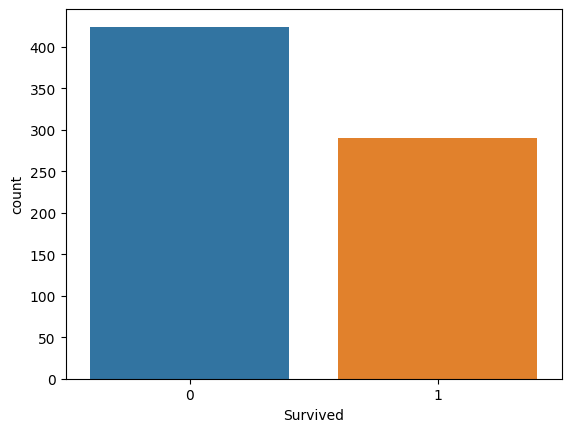

In [ ]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó
sns.countplot(data=data, x='Survived')
plt.show()

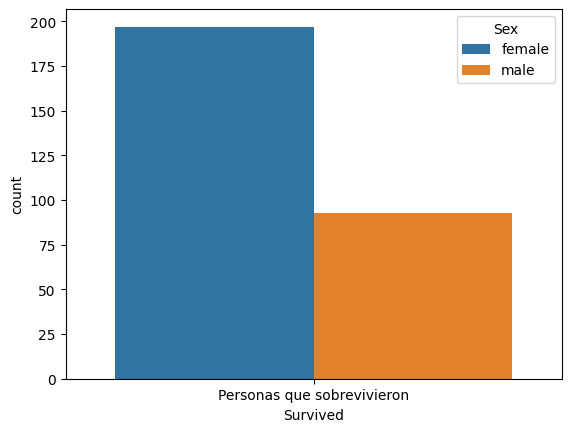

In [ ]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"

copy = data[data['Survived'] == 1]

sns.countplot(data=copy, x=copy['Survived'].replace({1:'Personas que sobrevivieron'}), hue='Sex')
plt.show()

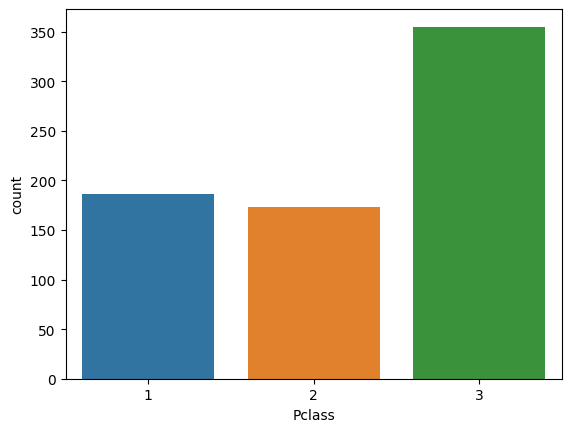

In [ ]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot

sns.countplot(data=data, x='Pclass')
plt.show()

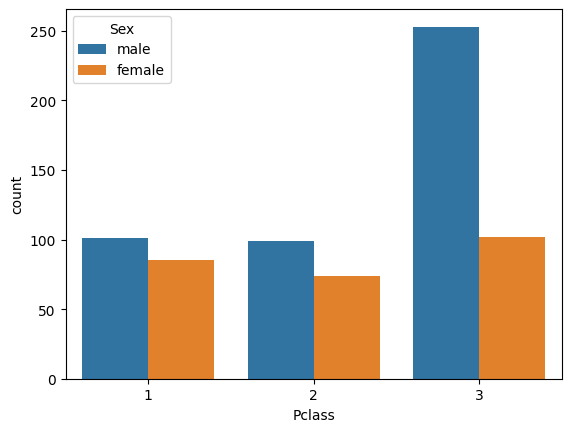

In [ ]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"

sns.countplot(data=data, x='Pclass', hue='Sex')
plt.show()

#### Transformar variables categóricas texto a clases numeradas

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando

df_cod = data.copy()

In [ ]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!

le = LabelEncoder()

label_encoding = le.fit_transform(df_cod['Sex'])

df_cod['Sex_LE'] = label_encoding
df_cod.drop('Sex', axis=1, inplace=True)
df_cod.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_LE
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [ ]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)
le.classes_

array(['female', 'male'], dtype=object)

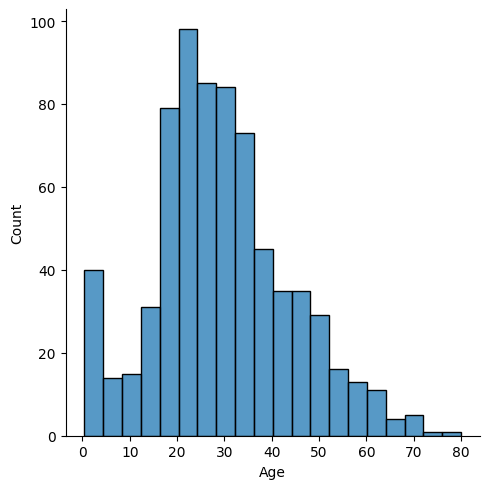

In [ ]:
# Alumno: Analizar la distribución de la edad

sns.displot(data=data, x='Age')

In [ ]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_norm = df_cod.copy()

In [ ]:
# Alumno: utilizar StandarScaler para normalizar la column de "Age"
# Conservar el scaler que lo necesitará para el final

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_norm.loc[:, 'Age'] = scaler.fit_transform(df_norm[['Age']]) # !!Lo estoy pasando como una matriz de una sola fila en caso de un solo corchete lo pasaria como una lista y daria error
df_norm.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_LE
0,0,3,-0.530377,1,0,1
1,1,1,0.571831,1,0,0
2,1,3,-0.254825,0,0,0
3,1,1,0.365167,1,0,0
4,0,3,0.365167,0,0,1


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [ ]:
# Alumno: genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived

X = df_norm.drop(['Survived'], axis=1).values
y = df_norm['Survived'].values

In [ ]:
# Alumno: obtener la cantidad de features (cantidad de columnas)
# y almacenar en in_shape
in_shape = X.shape[1]

In [ ]:
# Alumno: crear una variable out_shape indicando cuandas neuronas de salida desea
out_shape = 1

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 80%20%

In [ ]:
# Alumno, generar los dataset de train y test superando en 80%20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [ ]:
from keras.layers import Dense, InputLayer
# Alumno: crear un modelo secuencial de dos capas (hidden y output).
# Coloque correctamente el valor de in_shape y out_shape en el modelo
# pero seleccione por su cuenta la cantidad de neuronas en la capa oculta

model = Sequential()

model.add(Dense(units=64, activation='sigmoid', input_shape=(in_shape,)))

model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Alumno: compilar el modelo con binary_crossentropy y métrica de "accuracy"
import tensorflow as tf

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss='binary_crossentropy', metrics='accuracy')

In [ ]:
# Alumno: entrenar el modelo, seleccionar un 20% para el dataset de validacion
# Queda a su gusto seleccionar la cantidad de épocas
# Almacenar la salida del fit en una variable "history"

history = model.fit(X_train, y_train, validation_split=0.2, epochs=80)

Epoch 1/80
15/15 [==============================] - 8s 25ms/step - loss: 0.6707 - accuracy: 0.5855 - val_loss: 0.6800 - val_accuracy: 0.5478
Epoch 2/80
15/15 [==============================] - 0s 9ms/step - loss: 0.6351 - accuracy: 0.6053 - val_loss: 0.6459 - val_accuracy: 0.6174
Epoch 3/80
15/15 [==============================] - 0s 10ms/step - loss: 0.5994 - accuracy: 0.6842 - val_loss: 0.6248 - val_accuracy: 0.6522
Epoch 4/80
15/15 [==============================] - 0s 17ms/step - loss: 0.5724 - accuracy: 0.7039 - val_loss: 0.6012 - val_accuracy: 0.6870
Epoch 5/80
15/15 [==============================] - 0s 12ms/step - loss: 0.5509 - accuracy: 0.7522 - val_loss: 0.5727 - val_accuracy: 0.7391
Epoch 6/80
15/15 [==============================] - 0s 16ms/step - loss: 0.5327 - accuracy: 0.7697 - val_loss: 0.5551 - val_accuracy: 0.7478
Epoch 7/80
15/15 [==============================] - 0s 10ms/step - loss: 0.5142 - accuracy: 0.7982 - val_loss: 0.5542 - val_accuracy: 0.7217
Epoch 8/80
15/

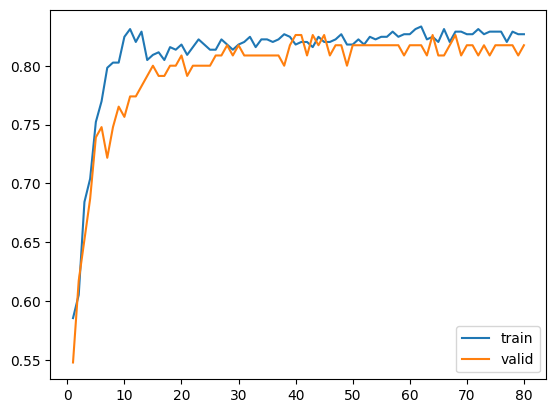

In [ ]:
# Alumno: Graficar la evolución del accuracy durante el entrenamiento
# tanto para el dataset de train y el de valid en un gráfico
# plot line
epoch_count = range(1, len(history.history['accuracy']) +1)

sns.lineplot(x=epoch_count, y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count, y=history.history['val_accuracy'], label='valid')
plt.show()


In [ ]:
# Alumno: obtener la probabilidad de sobreviir (y_hat_prob)
# realizando una prediccion (predict) con el dataset de test

y_hat_prob = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
# Alumno: transformar las probabilidads en 0 y 1, si la probabilidad es
# mayor o igual a 0.5 definir que la persona sobrevivió (1)
# Estos valores guardarlos en y_hat
y_hat = [1 if x >= 0.50 else 0 for x in y_hat_prob]

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [ ]:
# Alumno, calcular la exactitud (accuracy) de su modelo
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_hat, normalize=True)

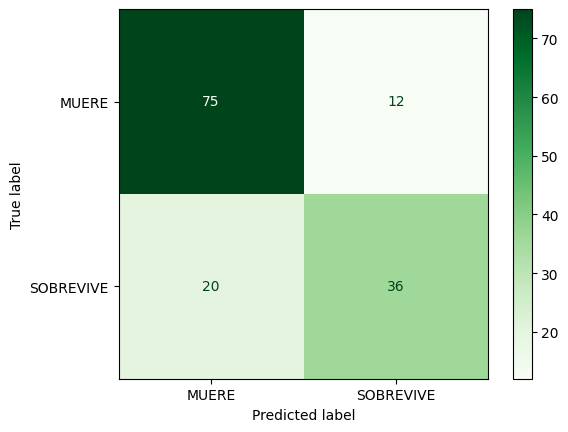

In [ ]:
# Alumno, dibujar la matriz de confusion
# definir display_labels=['NO SOBREVIVE', 'SOBREVIVE']

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=('MUERE', 'SOBREVIVE'))
cmd.plot(cmap=plt.cm.Greens)
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [ ]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores
# Recordar que los datos de edad (Age) se normalizaron, debe utilizar ese
# scaler generado para transformarlo

Pclass = 2
Sex = 'female'
Age = 4
SibSp = 0
Parch = 0

sex = int(le.transform([Sex]))
age = float(scaler.transform([[Age]]))

prueba = np.array([Pclass, sex, age, SibSp, Parch]).reshape(1,-1) # !!Utilizo reshape para darla una matriz
                                                                  # de dos dimensiones en caso de no querer hacerlo
                                                                  # este deberia de ser el codigo //
                                                                  # prueba = np.array([[Pclass, sex, age, SibSp, Parch]])
                                                                  # // con doble corchete

prediccion = float(model.predict(prueba))

if prediccion >= 0.5:
  print('Sobreviste')
else:
  print('You died')


1/1 [==============================] - 0s 18ms/step
Sobreviste


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
